<img src="https://astanait.edu.kz/wp-content/uploads/2020/05/aitu-logo-2-600x315.png" width="300" height="222" >
<br>
<br>  

<br>
<br>   
<br>
<br>


<h1 style="text-align: center"> AITUHackDay: Creative Industry </h1>
<h1 style="text-align: center"> Task 2. EdTech </h1> 
 
<br>
<br>

<br>
<br>
<br>
<br>
<br>
<br>




<h3 style="text-align: right">Team:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Moonlight</h3> 

<h3 style="text-align: right">Prepared by:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Zhuldyz Amangeldiyeva,</h3>   
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Bekdaulet Magadanov,</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Merey Orazaly, Olzhas Uikas</h3>

<br>
<br>
<br>
<br>



<p style="text-align: center; font-size: 18px; margin-right: 49px;">Nur-Sultan, 2022</h3>
<br>
<br>
<br>

### Outline:
1. Explore the dataset.     
2. Explanatory data analysis. Visualizations, dashboard.
4. Supervised learning. Build classification models for prediction the result (target: Pass/Fail) variable. 
5. Analyze models. ROC AUC
6. Conclusion.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import warnings
import itertools
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

## 1. Explore the dataset.

In [2]:
#Load and observe dataset
pdf = pd.read_csv('Pre Processing.csv')
pdf.head()

,ModuleCode,ModuleTitle,SessionName,ApplicantName,CGPA,CGPA.1,AttemptCount,AttemptCount.1,RemoteStudent,Probation,HighRisk,TermExceeded,AtRisk,AtRiskSSC,OtherModules,OtherModules.1,PlagiarismHistory,PlagiarismHistory.1,CW1,CW1.1,CW2,CW2.1,ESE,ESE.1,Online C,Online C.1,Online O,Online O.1,Played,Paused,Likes,Segment,Result
0,Module 2,Course 2,Session-A,Student 1,Very Good,3.50,1,Low,No,No,No,No,No,No,3,High,0,Low,72.5,Fair,72.5,Fair,65,Adequate,239,Very Good,301,Excellent,3,1,2,2,Pass
1,Module 2,Course 2,Session-A,Student 2,Fair,2.25,1,Low,No,No,No,No,No,No,3,High,0,Low,71.2,Fair,71.2,Fair,54.5,Adequate,18,Poor,13,Poor,1,0,0,0,Pass
2,Module 2,Course 2,Session-A,Student 3,Fair,2.50,1,Low,No,No,No,No,No,No,1,Low,0,Low,21.7,Fail,21.7,Fail,0,Fail,54,Fair,249,Very Good,2,2,1,1,Pass
3,Module 2,Course 2,Session-A,Student 4,Adequate,1.75,1,Low,No,No,No,No,No,No,3,High,1,Low,63.7,Adequate,63.7,Adequate,43.5,Fail,253,Very Good,90,Fair,3,1,1,2,Pass
4,Module 2,Course 2,Session-A,Student 5,Fair,2.50,1,Low,No,No,No,No,No,No,2,Medium,0,Low,55.8,Adequate,55.8,Adequate,64,Adequate,77,Fair,241,Very Good,8,13,1,7,Pass


In [3]:
pdf.shape

(326, 33)

**Comment: There are data about 326 students.**

In [4]:
#Function to output info about dataset (nan values, unique values)
def information_about_data(dataframe):
    result = pd.DataFrame({'Column name':dataframe.isnull().sum().index, 
                           'Number of Nan':dataframe.isnull().sum().values,
                           'Procent of Nan':(dataframe.isnull().sum().values/len(dataframe)*100).round(1).astype(str),
                           'Number of unique':dataframe.nunique().values})
    return result

In [5]:
information_about_data(pdf)

,Column name,Number of Nan,Procent of Nan,Number of unique
0,ModuleCode,0,0.0,5
1,ModuleTitle,0,0.0,5
2,SessionName,0,0.0,2
3,ApplicantName,0,0.0,326
4,CGPA,0,0.0,6
5,CGPA.1,2,0.6,11
6,AttemptCount,0,0.0,4
7,AttemptCount.1,0,0.0,3
8,RemoteStudent,0,0.0,2
9,Probation,0,0.0,2


In [6]:
pdf.RemoteStudent.value_counts()

No     325
Yes      1
Name: RemoteStudent, dtype: int64

In [7]:
pdf['PlagiarismHistory.1'].value_counts()

Low       325
Medium      1
Name: PlagiarismHistory.1, dtype: int64

In [8]:
pdf.drop(columns = ['RemoteStudent', 'PlagiarismHistory.1'], inplace = True)

<img src="argument1.jpg" width="800" height="800" >

In [63]:
df[df['ESE'] == 'Absent']

,ModuleCode,ModuleTitle,SessionName,ApplicantName,CGPA,CGPA.1,AttemptCount,AttemptCount.1,Probation,HighRisk,TermExceeded,AtRisk,AtRiskSSC,OtherModules,OtherModules.1,PlagiarismHistory,CW1,CW1.1,CW2,CW2.1,ESE,ESE.1,Online C,Online C.1,Online O,Online O.1,Played,Paused,Likes,Segment,Result,ESE_numeric,Total_grade,CW_avg,Result_new
76,Module 5,Course 5,Session-A,Student 77,Adequate,2.0,1,Low,No,Yes,No,Yes,Yes,3,High,1,49.5,Fail,0.0,Fail,Absent,Excellent,117,Good,0,Poor,1,0,1,0,Pass,0.0,12.375,24.75,Fail


In [65]:
df.loc[df['ESE'] == 'Absent', 'ESE.1'] = 'Fail'

In [66]:
df[df['ESE'] == 'Absent']

,ModuleCode,ModuleTitle,SessionName,ApplicantName,CGPA,CGPA.1,AttemptCount,AttemptCount.1,Probation,HighRisk,TermExceeded,AtRisk,AtRiskSSC,OtherModules,OtherModules.1,PlagiarismHistory,CW1,CW1.1,CW2,CW2.1,ESE,ESE.1,Online C,Online C.1,Online O,Online O.1,Played,Paused,Likes,Segment,Result,ESE_numeric,Total_grade,CW_avg,Result_new
76,Module 5,Course 5,Session-A,Student 77,Adequate,2.0,1,Low,No,Yes,No,Yes,Yes,3,High,1,49.5,Fail,0.0,Fail,Absent,Fail,117,Good,0,Poor,1,0,1,0,Pass,0.0,12.375,24.75,Fail


In [64]:
df = pdf.copy()

df['ESE_numeric'] = df.ESE
df.loc[df['ESE'] == 'Absent', 'ESE_numeric'] = 0.0
df["ESE_numeric"] = pd.to_numeric(df["ESE_numeric"])

df['Total_grade'] = ((df['CW1']+ df['CW2'])/2)*0.5 + df['ESE_numeric']*0.5
df['CW_avg'] = (df['CW1']+ df['CW2'])/2
df['Result_new'] = 'Fail'
df.loc[(df['Total_grade'] >= 50) & (df.ESE_numeric >= 35), 'Result_new'] = 'Pass'
df.head()

,ModuleCode,ModuleTitle,SessionName,ApplicantName,CGPA,CGPA.1,AttemptCount,AttemptCount.1,Probation,HighRisk,TermExceeded,AtRisk,AtRiskSSC,OtherModules,OtherModules.1,PlagiarismHistory,CW1,CW1.1,CW2,CW2.1,ESE,ESE.1,Online C,Online C.1,Online O,Online O.1,Played,Paused,Likes,Segment,Result,ESE_numeric,Total_grade,CW_avg,Result_new
0,Module 2,Course 2,Session-A,Student 1,Very Good,3.50,1,Low,No,No,No,No,No,3,High,0,72.5,Fair,72.5,Fair,65,Adequate,239,Very Good,301,Excellent,3,1,2,2,Pass,65.0,68.75,72.5,Pass
1,Module 2,Course 2,Session-A,Student 2,Fair,2.25,1,Low,No,No,No,No,No,3,High,0,71.2,Fair,71.2,Fair,54.5,Adequate,18,Poor,13,Poor,1,0,0,0,Pass,54.5,62.85,71.2,Pass
2,Module 2,Course 2,Session-A,Student 3,Fair,2.50,1,Low,No,No,No,No,No,1,Low,0,21.7,Fail,21.7,Fail,0,Fail,54,Fair,249,Very Good,2,2,1,1,Pass,0.0,10.85,21.7,Fail
3,Module 2,Course 2,Session-A,Student 4,Adequate,1.75,1,Low,No,No,No,No,No,3,High,1,63.7,Adequate,63.7,Adequate,43.5,Fail,253,Very Good,90,Fair,3,1,1,2,Pass,43.5,53.60,63.7,Pass
4,Module 2,Course 2,Session-A,Student 5,Fair,2.50,1,Low,No,No,No,No,No,2,Medium,0,55.8,Adequate,55.8,Adequate,64,Adequate,77,Fair,241,Very Good,8,13,1,7,Pass,64.0,59.90,55.8,Pass


A failed module may be assigned a condoned pass by an appropriate Examination Board in the above circumstance under any one of the situations (A or B) mentioned below subject to the following conditions.
1. Condoned module may not be repeated or reassessed in any way in future
2. Condoned module may not be raised to a pass
3. Failure in the Degree or Diploma Project, as the case may be, will not be condoned.
4. For modules assessed by 100% coursework only situation A shall apply.

A. Student has obtained 45% aggregate marks (total marks obtained from all assessments) in the module.
B. Student has obtained at least 40% aggregate marks in coursework assessments and additionally obtained at least 40% aggregate marks in end-semester assessments of the module

In [10]:
df.loc[((df.Total_grade >= 45) | ((df.CW_avg >= 40) & (df.ESE_numeric >=40 ))) & (df.Result_new == 'Fail'), 'Result_new'] = 'Pass'

In [11]:
df.Result.value_counts()

Pass    264
Fail     62
Name: Result, dtype: int64

In [12]:
df.Result_new.value_counts()

Pass    230
Fail     96
Name: Result_new, dtype: int64

In [13]:
df.Result_new.value_counts()/len(df)

Pass    0.705521
Fail    0.294479
Name: Result_new, dtype: float64

### Description of columns:

- ApplicantName: Name of the student, with a nominal data type such as “Student 1”.
- CGPA: Cumulative grade point average of the student, with a discrete data type such as “4.0”.
- AttemptCount: The number of attempts in the module, with a discrete data type such as “1”.
- RemoteStudent: Either the student is under remote study mode or not, with a nominal data type such as “Yes/No”.
- Probation: Either the student has a backlog of modules to clear, with a nominal data type such as “Yes/No”.
- HighRisk: The high failure rate in a module, with a nominal data type such as “Yes/No”.
- TeamExceed: Progression rate of the student in the degree plan, with a nominal data type such as “Yes/No”.
- AtRisk: Previously failed two or more modules, with a nominal data type such as “Yes/No”.
- AtRiskSSC: Whether the student been registered by the student success center for any educational deficiencies, with a nominal data type such as “Yes/No”.
- OtherModules: A student registered in any other modules in the current semester, with a numeric data type such as “1”.
- PlagiarismHistory: Onto which modules the student has been booked for academic integrity violation, including module and academic year, with a nominal data type such as “Module 3”.
- CW1: Marks obtained by the student in their first coursework, with a discrete data type such as “86.5”.
- CW2: Marks obtained by the student in their second coursework, with a discrete data type such as “86.5”.
- ESE: Marks obtained in the end semester examination, with a discrete data type such as “86.5”.
- Online C: User-performed activities within campus (in minutes), with a discrete data type such as “25”.
- Online O: User-performed activities outside of campus (in minutes), with a discrete data type such as “25”.
- Played: The number of times the video has been played.
- Paused: The number of times the video has been paused.
- Likes: The number of times the student has liked the video.
- Segment: The number of times a student has played a specific portion of the video by using the slider.
- Result: Target variable. Student Pass/Fail.

## 2. Explanatory data analysis. Visualizations, dashboard.

Counter({0: 9900, 1: 100})


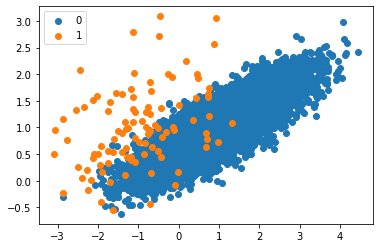

In [14]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where


X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

<img src="dashboard2.png" width="1000" height="1000" >

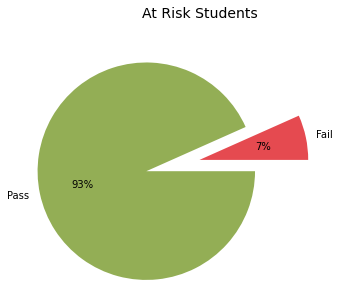

In [58]:
risks = df[df['AtRiskSSC'] == 'Yes'].groupby(['Result'])['ApplicantName'].count()
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(risks.values, labels = risks.index, autopct='%1.0f%%', explode = (0, 0.5), colors = ['#e54a50', '#93ae55'])
ax.set_title("At Risk Students", size = 14)
plt.show()

<img src="dashboard3.png" width="1000" height="1000" >

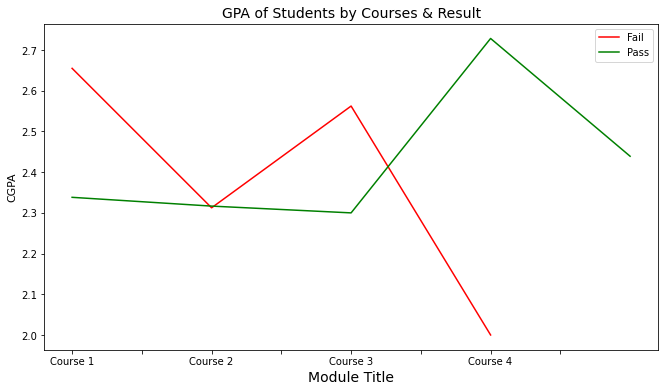

In [62]:
df_mean = df[['Result_new','ModuleTitle', 'CGPA.1']].groupby(['Result_new','ModuleTitle']).mean().reset_index()
fail = df_mean[df_mean['Result_new'] == 'Fail']
passed = df_mean[df_mean['Result_new'] == 'Pass']

plt.figure(figsize=(11,6))

# Create an axes object 
axes = plt.gca()

# pass the axes object to plot function
fail.plot(x='ModuleTitle', y='CGPA.1', ax = axes, label = 'Fail', color = 'r')
passed.plot(x='ModuleTitle', y='CGPA.1', ax = axes, label = 'Pass', color = 'g')
plt.xlabel('Module Title', size = 14)
plt.ylabel('CGPA', size = 11)
plt.title('GPA of Students by Courses & Result', size = 14)
plt.show()

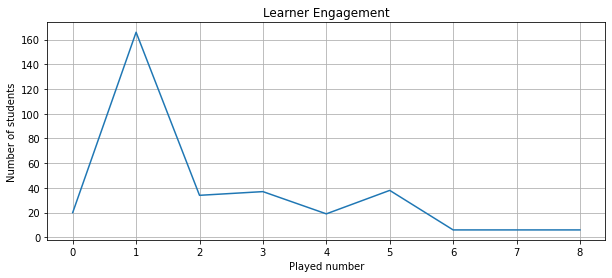

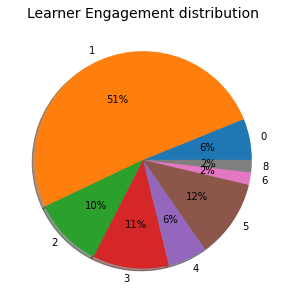

In [19]:
counts = df.groupby(['Played'])['ApplicantName'].count()

#Visualization of linear plot
plt.figure(figsize=(10,4))
plt.plot(counts.index, counts.values)
plt.grid()
plt.xlabel('Played number')
plt.ylabel('Number of students')
plt.title("Learner Engagement")
plt.show()

#Visualisation with pie chart using mathpotlib
fig, ax = plt.subplots(figsize=(10,5))
ax.pie(counts.values, labels = counts.index, autopct='%1.0f%%',shadow=True)
ax.set_title("Learner Engagement distribution", size = 14)
plt.show()

**Коммент: Линейный график и pie chart показывают вовлеченность студентов в образовательный контент (видео-лекции). Как мы можем заметить, приблизительно 160 (51%) студентов смотрят предоставленный видео материал хотя бы 1 раз.**

**Выявление отстающих студентов**

In [55]:
summer = df[( (df['ESE'] == "Adequate" ) | (df['ESE'] == "Fail") ) & (df['Played'] <= 1) & (df['TermExceeded'] == "No") | ( (df['HighRisk'] == "Yes") & ( (df['AtRisk'] == "Yes") | (df['AtRiskSSC'] == "Yes") ) )]
summer.head()

,ModuleCode,ModuleTitle,SessionName,ApplicantName,CGPA,CGPA.1,AttemptCount,AttemptCount.1,Probation,HighRisk,TermExceeded,AtRisk,AtRiskSSC,OtherModules,OtherModules.1,PlagiarismHistory,CW1,CW1.1,CW2,CW2.1,ESE,ESE.1,Online C,Online C.1,Online O,Online O.1,Played,Paused,Likes,Segment,Result,ESE_numeric,Total_grade,CW_avg,Result_new
24,Module 2,Course 2,Session-A,Student 25,Poor,0.00,2,Medium,Yes,Yes,No,Yes,Yes,4,Low,0,86.56,Very Good,86.56,Very Good,78.5,Good,399,Excellent,249,Very Good,1,2,0,0,Pass,78.5,82.5300,86.560,Pass
37,Module 2,Course 2,Session-A,Student 38,Adequate,1.75,2,Medium,No,Yes,No,Yes,No,1,Low,0,77.20,Good,77.20,Good,53,Adequate,255,Very Good,93,Fair,1,0,1,0,Pass,53.0,65.1000,77.200,Pass
59,Module 5,Course 5,Session-B,Student 60,Adequate,1.75,1,Low,No,Yes,No,Yes,No,3,High,1,69.30,Fair,69.35,Fair,77,Good,224,Very Good,123,Good,1,4,0,0,Pass,77.0,73.1625,69.325,Pass
76,Module 5,Course 5,Session-A,Student 77,Adequate,2.00,1,Low,No,Yes,No,Yes,Yes,3,High,1,49.50,Fail,0.00,Fail,Absent,Excellent,117,Good,0,Poor,1,0,1,0,Pass,0.0,12.3750,24.750,Fail
90,Module 4,Course 4,Session-A,Student 91,Adequate,2.00,3,High,Yes,Yes,No,Yes,No,1,Low,0,40.00,Fail,46.00,Fail,86,Very Good,73,Fair,240,Very Good,1,1,0,0,Pass,86.0,64.5000,43.000,Pass


[Text(0.5, 0, 'HighRisk[Yes] & (AtRisk[Yes] | AtRiskSSC[Yes])'),
 Text(0, 0.5, 'Number of students')]

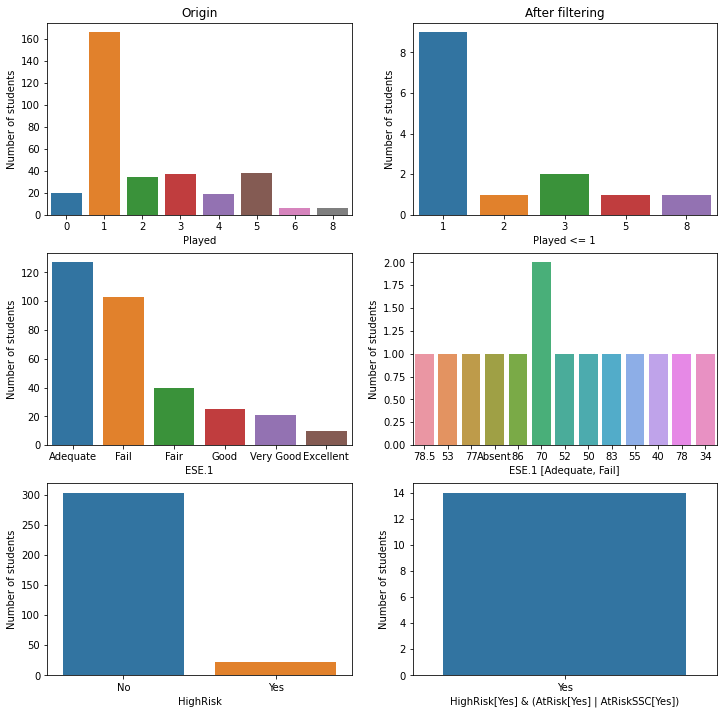

In [56]:
f, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,12))


sns.countplot(data=df, x='Played', ax=axs[0,0])
axs[0,0].set(title='Origin', xlabel ='Played', ylabel ='Number of students')

sns.countplot(data=summer, x='Played', ax=axs[0,1])
axs[0,1].set(title='After filtering', xlabel ='Played <= 1', ylabel ='Number of students')


sns.countplot(data=df, x='ESE.1', ax=axs[1,0])
axs[1,0].set(xlabel ='ESE.1', ylabel ='Number of students')

sns.countplot(data=summer, x='ESE', ax=axs[1,1])
axs[1,1].set(xlabel ='ESE.1 [Adequate, Fail]', ylabel ='Number of students')


sns.countplot(data=df, x='HighRisk', ax=axs[2,0])
axs[2,0].set(xlabel ='HighRisk', ylabel ='Number of students')

sns.countplot(data=summer, x='HighRisk', ax=axs[2,1])
axs[2,1].set(xlabel ='HighRisk[Yes] & (AtRisk[Yes] | AtRiskSSC[Yes])', ylabel ='Number of students')

**Comment:** 

    Origin contains *Final Dataset.csv* dataset.
    
    After filtering: 
1. *ESE* contains Adequate, Fail.
2. *Played* contains equal or less than 1.
3. *TermExceeded* should be "No".
4. *AtRisk* or *AtRiskSSC* should be "Yes".
5. *HighRisk* should be "Yes".

In [22]:
print(f"Количество отстающих студентов: {summer.count()[0]}")

Количество отстающих студентов: 14


## 3. Supervised learning. Build classification models for prediction the result (target: Pass/Fail) variable.

In [23]:
df_new = df[['CGPA', 'HighRisk', 'AtRiskSSC', 'CW1.1', 'CW2.1', 'ESE.1', 'Online C.1', 'Online O.1', 'Played', 'Paused','Likes','Segment', 'Result_new']]
df_new.head()

,CGPA,HighRisk,AtRiskSSC,CW1.1,CW2.1,ESE.1,Online C.1,Online O.1,Played,Paused,Likes,Segment,Result_new
0,Very Good,No,No,Fair,Fair,Adequate,Very Good,Excellent,3,1,2,2,Pass
1,Fair,No,No,Fair,Fair,Adequate,Poor,Poor,1,0,0,0,Pass
2,Fair,No,No,Fail,Fail,Fail,Fair,Very Good,2,2,1,1,Fail
3,Adequate,No,No,Adequate,Adequate,Fail,Very Good,Fair,3,1,1,2,Pass
4,Fair,No,No,Adequate,Adequate,Adequate,Fair,Very Good,8,13,1,7,Pass


In [24]:
for i in range(1, len(df_new.columns)):
    print(df_new.columns[i], df_new.iloc[:,i].unique())

HighRisk ['No' 'Yes']
AtRiskSSC ['No' 'Yes']
CW1.1 ['Fair' 'Fail' 'Adequate' 'Very Good' 'Good' 'Excellent']
CW2.1 ['Fair' 'Fail' 'Adequate' 'Very Good' 'Good' 'Excellent']
ESE.1 ['Adequate' 'Fail' 'Fair' 'Good' 'Very Good' 'Excellent']
Online C.1 ['Very Good' 'Poor' 'Fair' 'Excellent' 'Good' 'Adequate']
Online O.1 ['Excellent' 'Poor' 'Very Good' 'Fair' 'Good' 'Adequate']
Played [3 1 2 8 5 6 4 0]
Paused [ 1  0  2 13  3  7  6  4  5]
Likes [2 0 1 3]
Segment [2 0 1 7 4 5 3]
Result_new ['Pass' 'Fail']


In [25]:
dfads = df_new.loc[:,'CGPA':'Online O.1'].apply(lambda x: pd.factorize(x)[0])
dfads['Played'], dfads['Paused'], dfads['Likes'], dfads['Segment'] = df_new['Played'], df_new['Paused'], df_new['Likes'], df_new['Segment']
dfads['Result'] = df_new.Result_new.map({'Fail':0, 'Pass':1})
dfads.head()

,CGPA,HighRisk,AtRiskSSC,CW1.1,CW2.1,ESE.1,Online C.1,Online O.1,Played,Paused,Likes,Segment,Result
0,0,0,0,0,0,0,0,0,3,1,2,2,1
1,1,0,0,0,0,0,1,1,1,0,0,0,1
2,1,0,0,1,1,1,2,2,2,2,1,1,0
3,2,0,0,2,2,1,0,3,3,1,1,2,1
4,1,0,0,2,2,0,2,2,8,13,1,7,1


In [26]:
dfm = dfads
dfm.head()

,CGPA,HighRisk,AtRiskSSC,CW1.1,CW2.1,ESE.1,Online C.1,Online O.1,Played,Paused,Likes,Segment,Result
0,0,0,0,0,0,0,0,0,3,1,2,2,1
1,1,0,0,0,0,0,1,1,1,0,0,0,1
2,1,0,0,1,1,1,2,2,2,2,1,1,0
3,2,0,0,2,2,1,0,3,3,1,1,2,1
4,1,0,0,2,2,0,2,2,8,13,1,7,1


In [27]:
dfm.Result.value_counts()

1    230
0     96
Name: Result, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(dfm.iloc[:,:-1], dfm.Result, test_size=0.20, random_state=2022)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(260, 12) (260,)
(66, 12) (66,)


### Random Forest

In [29]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [30]:
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                           columns=[" Predicted NO", " Predicted YES"],
                           index=[" Actual NO", " Actual YES"])
conf_matrix

,Predicted NO,Predicted YES
Actual NO,13,1
Actual YES,3,49


In [31]:
x = dfm.iloc[:,:-1]
y = dfm.Result

In [32]:
parameters = {'max_depth':range(3, 20)}
rf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs = 4)
rf.fit(X = x_train, y = y_train)
rf_model = rf.best_estimator_
print (rf.best_score_, rf.best_params_)

0.9346153846153846 {'max_depth': 4}


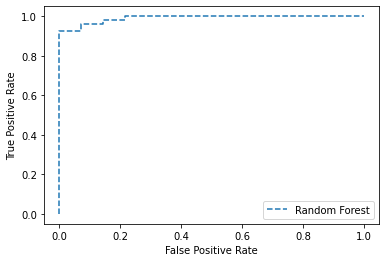

In [33]:
y_pred = rf_model.predict(x_test)
y_scores = rf_model.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])

plt.plot(fpr, tpr, linestyle='--', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [34]:
conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), 
                           columns=[" Predicted NO", " Predicted YES"],
                           index=[" Actual NO", " Actual YES"])
print(sum(y_test == y_pred)/len(y_test))
conf_matrix

0.9393939393939394


,Predicted NO,Predicted YES
Actual NO,13,1
Actual YES,3,49


In [35]:
print(classification_report(y_test, y_pred, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.98      0.94      0.96        52

    accuracy                           0.94        66
   macro avg       0.90      0.94      0.91        66
weighted avg       0.94      0.94      0.94        66



In [36]:
step_factor = 0.05 
threshold_value = 0.2 
roc_score=0
predicted_proba = rf.predict_proba(x_test) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',round(temp_thresh,2),'--',round(roc_auc_score(y_test, predicted),2))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('\nRandom Forest Classifier')
print('---Optimum Threshold ---',thrsh_score,'--ROC--',round(roc_score,2))

Threshold 0.2 -- 0.5
Threshold 0.25 -- 0.57
Threshold 0.3 -- 0.86
Threshold 0.35 -- 0.92
Threshold 0.4 -- 0.95
Threshold 0.45 -- 0.94
Threshold 0.5 -- 0.94
Threshold 0.55 -- 0.96
Threshold 0.6 -- 0.9
Threshold 0.65 -- 0.89
Threshold 0.7 -- 0.88
Threshold 0.75 -- 0.87

Random Forest Classifier
---Optimum Threshold --- 0.5499999999999999 --ROC-- 0.96


### Logistic Regression 

In [37]:
lf = LogisticRegression(solver='newton-cg')
lf.fit(x_train, y_train)

y_pred2 = lf.predict(x_test)

conf_matrix2 = pd.DataFrame(confusion_matrix(y_test, y_pred2), 
                           columns=[" Predicted NO", " Predicted YES"],
                           index=[" Actual NO", " Actual YES"])
conf_matrix2

,Predicted NO,Predicted YES
Actual NO,8,6
Actual YES,9,43


In [38]:
def forward_stepwise_selection(data, target):
    total_features = [[]]
    score_dict = {}
    remaining_features = [col for col in data.columns]
    for i in range(1, len(data.columns)+1):
        best_score = 0; best_feature = None
        for feature in remaining_features:
            X = total_features[i-1] + [feature]
            model = LogisticRegression(solver='newton-cg').fit(data[X], target)
            score = sum(target == model.predict(data[X]))/len(target)
            if score > best_score:
                best_score = score
                best_feature = feature
        total_features.append(total_features[i-1] + [best_feature])
        remaining_features.remove(best_feature)
        score_dict[i] = best_score
    return total_features,score_dict


total_features_fwd, score_dict_fwd = forward_stepwise_selection(x_train, y_train)


for i in range(1, len(dfm.iloc[:,:-1].columns)):
    print('The best model with {} features - {}'.format(i,total_features_fwd[i]))
    print('R_2 score is %.3f'%score_dict_fwd[i])
    print()

The best model with 1 features - ['Likes']
R_2 score is 0.719

The best model with 2 features - ['Likes', 'Played']
R_2 score is 0.754

The best model with 3 features - ['Likes', 'Played', 'HighRisk']
R_2 score is 0.758

The best model with 4 features - ['Likes', 'Played', 'HighRisk', 'AtRiskSSC']
R_2 score is 0.762

The best model with 5 features - ['Likes', 'Played', 'HighRisk', 'AtRiskSSC', 'Segment']
R_2 score is 0.758

The best model with 6 features - ['Likes', 'Played', 'HighRisk', 'AtRiskSSC', 'Segment', 'CW2.1']
R_2 score is 0.777

The best model with 7 features - ['Likes', 'Played', 'HighRisk', 'AtRiskSSC', 'Segment', 'CW2.1', 'CGPA']
R_2 score is 0.777

The best model with 8 features - ['Likes', 'Played', 'HighRisk', 'AtRiskSSC', 'Segment', 'CW2.1', 'CGPA', 'Online C.1']
R_2 score is 0.796

The best model with 9 features - ['Likes', 'Played', 'HighRisk', 'AtRiskSSC', 'Segment', 'CW2.1', 'CGPA', 'Online C.1', 'Paused']
R_2 score is 0.804

The best model with 10 features - ['Li

In [39]:
step_factor = 0.05 
threshold_value = 0.2 
roc_score=0
predicted_proba = lf.predict_proba(x_test) #probability of prediction
while threshold_value <=0.8: #continue to check best threshold upto probability 0.8
    temp_thresh = threshold_value
    predicted = (predicted_proba [:,1] >= temp_thresh).astype('int') #change the class boundary for prediction
    print('Threshold',round(temp_thresh,2),'--',round(roc_auc_score(y_test, predicted),2))
    if roc_score<roc_auc_score(y_test, predicted): #store the threshold for best classification
        roc_score = roc_auc_score(y_test, predicted)
        thrsh_score = threshold_value
    threshold_value = threshold_value + step_factor
print('---Optimum Threshold ---',thrsh_score,'--ROC--',round(roc_score,2))

Threshold 0.2 -- 0.61
Threshold 0.25 -- 0.61
Threshold 0.3 -- 0.67
Threshold 0.35 -- 0.63
Threshold 0.4 -- 0.63
Threshold 0.45 -- 0.62
Threshold 0.5 -- 0.7
Threshold 0.55 -- 0.7
Threshold 0.6 -- 0.72
Threshold 0.65 -- 0.7
Threshold 0.7 -- 0.68
Threshold 0.75 -- 0.7
---Optimum Threshold --- 0.6 --ROC-- 0.72


In [40]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
lf_cv=GridSearchCV(lf,grid,cv=10)
lf_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",lf_cv.best_params_)
print("accuracy :",lf_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.7576923076923078


In [41]:
best_lfmodel = lf_cv.best_estimator_
pred_test = best_lfmodel.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, pred_test)

0.8118131868131868

### Decision Tree

In [42]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
dt_y_pred = clf.predict(x_test)
dt_y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, dt_y_pred), 
                           columns=[" Predicted NO", " Predicted YES"],
                           index=[" Actual NO", " Actual YES"])
print(sum(y_test == dt_y_pred)/len(y_test))
conf_matrix

0.8787878787878788


,Predicted NO,Predicted YES
Actual NO,11,3
Actual YES,5,47


In [59]:
dtree = tree.DecisionTreeClassifier()
param_tree = dict({'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11]})

dtree_gscv = GridSearchCV(dtree, param_tree, cv=5)
dtree_gscv.fit(x_train, y_train)
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 6}

### kNN 

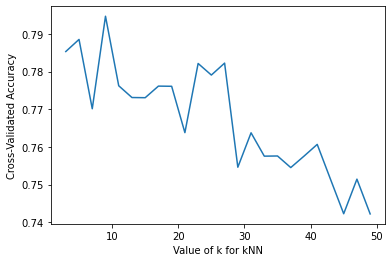

In [44]:
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning, message = '`np.bool` is a deprecated alias')

num_folds = 5

neighbors = range(3, 51, 2)

k_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y, cv = num_folds, scoring = 'accuracy')
    k_scores.append(scores.mean())
    
plt.plot(neighbors, k_scores)
plt.xlabel('Value of k for kNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [45]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(48, 51)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x, y)

knn_gscv.best_params_

{'n_neighbors': 50}

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
 
knn.fit(x_train, y_train)
 
k_y_pred = knn.predict(x_test)
print(sum(y_test == k_y_pred)/len(y_test))
print(k_y_pred)

0.8636363636363636
[1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1
 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0]


In [47]:
conf_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, k_y_pred), 
                           columns=[" Predicted NO", " Predicted YES"],
                           index=[" Actual NO", " Actual YES"])
print(sum(y_test == k_y_pred)/len(y_test))
conf_matrix

0.8636363636363636


,Predicted NO,Predicted YES
Actual NO,12,2
Actual YES,7,45


In [48]:
print(classification_report(y_test, y_pred, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.98      0.94      0.96        52

    accuracy                           0.94        66
   macro avg       0.90      0.94      0.91        66
weighted avg       0.94      0.94      0.94        66



In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1 = LinearDiscriminantAnalysis()
lda1.fit_transform(x_train,y_train)
result_lda1 = lda1.predict(x_test)
print(confusion_matrix(y_test, result_lda1))
print("\n")
print(classification_report(y_test, result_lda1))

[[ 8  6]
 [ 9 43]]


              precision    recall  f1-score   support

           0       0.47      0.57      0.52        14
           1       0.88      0.83      0.85        52

    accuracy                           0.77        66
   macro avg       0.67      0.70      0.68        66
weighted avg       0.79      0.77      0.78        66



In [53]:
print(sum(y_test == result_lda1)/len(y_test))

0.7727272727272727


## 5. Analyze Models. ROC AUC

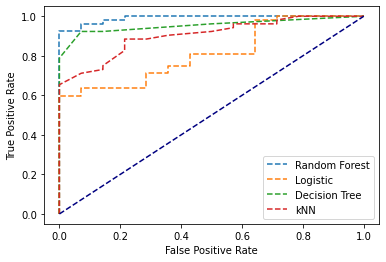

In [61]:
#Random Forest
y_pred = rf_model.predict(x_test)
y_scores = rf_model.predict_proba(x_test)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_scores[:, 1])

#Logistic
best_lfmodel = lf_cv.best_estimator_
pred_test = best_lfmodel.predict_proba(x_test)[:, 1]
fpr1, tpr1, threshold1 = roc_curve(y_test, pred_test)

#DesicionTree
best_dtree_par = dtree_gscv.best_estimator_
pred_test_dtree = best_dtree_par.predict_proba(x_test)[:, 1]
fpr2, tpr2, threshold2 = roc_curve(y_test, pred_test_dtree)

#kNN
best_kNNmodel = knn_gscv.best_estimator_
pred_test_knn = best_kNNmodel.predict_proba(x_test)[:, 1]
fpr3, tpr3, threshold3 = roc_curve(y_test, pred_test_knn)

plt.plot(fpr, tpr, linestyle='--', label='Random Forest')
plt.plot(fpr1, tpr1, linestyle='--', label='Logistic')
plt.plot(fpr2, tpr2, linestyle='--', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--', label='kNN')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## References

[1] Degree Awarded by Middle East College STUDENT HANDBOOK. Middle East College. https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiUwpzh04b3AhWRvYsKHehfDicQFnoECAoQAQ&url=https%3A%2F%2Fportal.mec.edu.om%2FDocs%2F2020-21%2FStudentHandbook%2FHandbook_UG_ARM_2020-21.pdf&usg=AOvVaw2acnVzGOztXlXLDFxqY5oj